In [1]:
#! python3

__author__ = 'Simanta Barman'
__email__ = 'barman017@umn.edu'

In [2]:
import numpy as np                               # For Linear algebra
from scipy.linalg import toeplitz
from matplotlib import pyplot as plt             # For Plotting

plt.rcParams["figure.figsize"] = (16, 9)

In [110]:
class Statistics:
    def __init__(self, data):
        self.data = np.array(data)
    
    def mean(self, data=None):
        data = data = self.data if data is None else data
        return sum(data) / len(data)
    
    def variance(self, data=None):
        data = np.array(data) if data is not None else self.data
        return (np.sum((data - self.mean(data))**2) / len(data))
    
    def standard_deviation(self, data=None):
        data = self.data if data is None else data 
        return self.variance(data) ** 0.5
    
    def auto_covariance(self, lag, data1=None, data2=None):
        data1 = self.data if data1 is None else data1
        data2 = self.data if data2 is None else data2
        
        data1 = data1[-len(data2):]
        
        return sum((data1[t] - self.mean(data1))*(data2[t+lag] - self.mean(data2)) for t in range(len(data2) - lag)) / len(data2)
    
    def acf(self, lag, data1=None, data2=None):
        data1 = np.array(data1) if data1 is not None else self.data
        data2 = np.array(data2) if data2 is not None else self.data
        
        return self.auto_covariance(lag, data1, data2) / (self.standard_deviation(data1) * self.standard_deviation(data1))
    
    def acf_plotter(self, lags=None, data=None):
        data = np.array(data) if data is not None else self.data
        if not lags:
            lags = len(data)
        

        # Approximating Confidence Interval (ci) 95%
        # if pos is 0 function returns lower interval else higher interval
        ci_95 = lambda n, pos: (-1 / n) + (2 / n**0.5) * pos
        
        # plotting ci
        ci_95_x = np.linspace(0, lags)
        ci_95_y = np.ones_like(ci_95_x) * lags
        plt.fill_between(ci_95_x, ci_95(ci_95_y, -1), ci_95(ci_95_y, 1), facecolor='green', alpha=0.2)
        
        # plotting acf
        ys = [self.acf(k) for k in range(lags)]
        plt.bar(list(range(lags)), ys, width=0.2)
        plt.scatter(list(range(lags)), ys)
        
        plt.title('Autocorrelation vs Lags')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelation')
        
        plt.show()
        
    def pacf(self, lags=None, data=None):
        data = np.array(data) if data is not None else self.data
        if not lags or lags > len(data) // 2:
            lags = len(data) // 2
            
        acfs = np.array([self.acf(k) for k in range(len(data))])
        
        # Levinson–Durbin recursion
        matrix = toeplitz(acfs[:lags])
        all_pacfs = np.linalg.inv(matrix).dot(acfs[1:lags+1])
        
        return np.insert(all_pacfs, 0, acfs[0])
    
    def pacf_plotter(self, lags=None, data=None):
        data = np.array(data) if data is not None else self.data
        if not lags or lags > len(data) // 2:
            lags = len(data) // 2
            
        # Approximating Confidence Interval (ci) 95%
        # if pos is 0 function returns lower interval else higher interval
        ci_95 = lambda n, pos: (-1 / n) + (2 / n**0.5) * pos
        
        # plotting ci
        ci_95_x = np.linspace(0, lags)
        ci_95_y = np.ones_like(ci_95_x) * lags
        plt.fill_between(ci_95_x, ci_95(ci_95_y, -1), ci_95(ci_95_y, 1), facecolor='green', alpha=0.2)
        
        pacfs = self.pacf(lags)
        plt.bar(list(range(len(pacfs))), pacfs, width=0.2)
        plt.scatter(list(range(len(pacfs))), pacfs)
        plt.title('Partial Autocorrelation vs lags')
        plt.title('Partial Autocorrelation vs Lags')
        plt.xlabel('Lags')
        plt.ylabel('Partial Autocorrelation')
        plt.show()

In [111]:
data = np.random.randint(0, 11, size=100)
stats = Statistics(data)

In [112]:
stats.mean()

4.71

In [113]:
stats.variance()

10.4059

In [114]:
stats.standard_deviation()

3.22581772578675

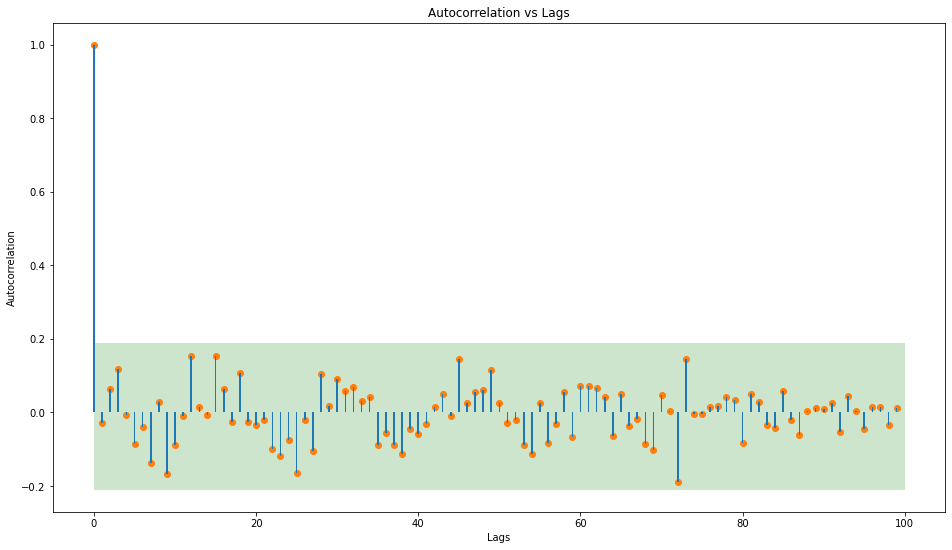

In [115]:
stats.acf_plotter(100)

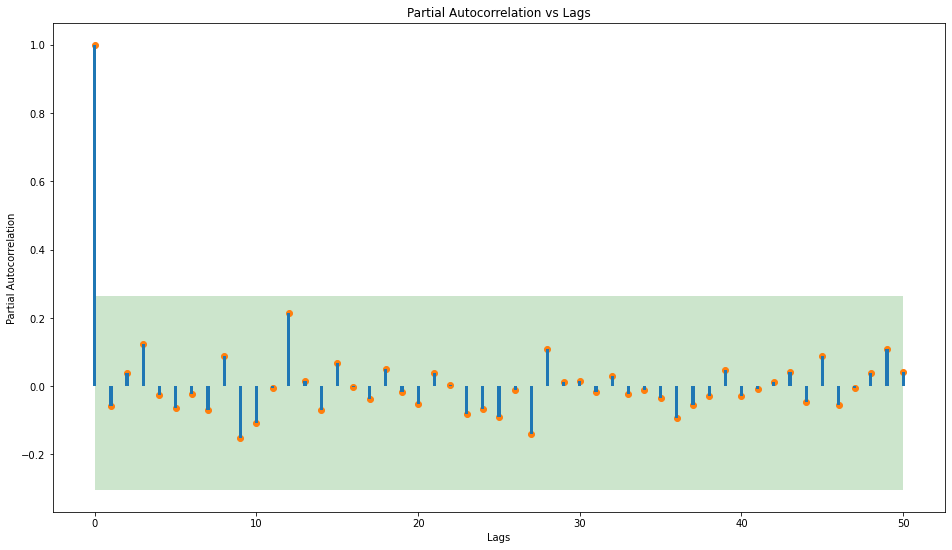

In [116]:
stats.pacf_plotter()